In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [10]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
data.describe

<bound method NDFrame.describe of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2               0
1    4.9  3.0  1.4  0.2               0
2    NaN  3.2  1.3  0.2               0
3    4.6  3.1  1.5  0.2               0
4    5.0  3.6  1.4  0.2               0
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3               2
146  6.3  2.5  5.0  1.9               2
147  6.5  3.0  NaN  2.0               2
148  6.2  3.4  5.4  2.3               2
149  5.9  3.0  5.1  1.8               2

[150 rows x 5 columns]>

In [12]:
for col in ['SL','SW','PL']:
    data[col]=data[col].fillna(data[col].median())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# OUTLIER HANDLING

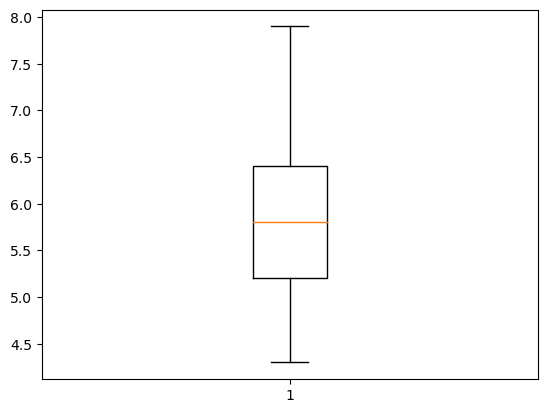

In [15]:
plt.boxplot(data['SL'])
plt.show()

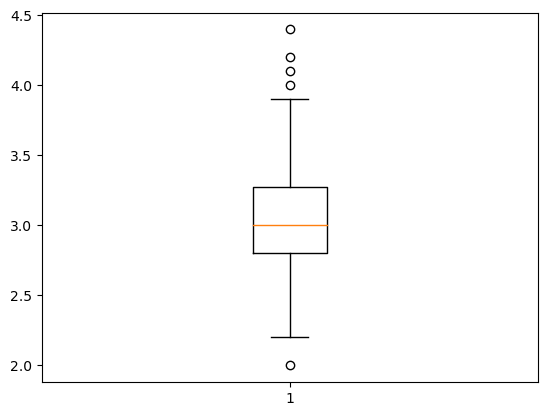

In [22]:
plt.boxplot(data['SW'])
plt.show()

In [24]:
q1=np.percentile(data['SW'],25,interpolation='midpoint')
q2=np.percentile(data['SW'],50,interpolation='midpoint')
q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [25]:
print(q1)
print(q2)
print(q3)

2.8
3.0
3.25


In [26]:
iqr=q3-q1
print(iqr)

0.4500000000000002


In [27]:
up_lim=q3+1.5*iqr
lr_lim=q1-1.5*iqr
print(up_lim)
print(lr_lim)

3.9250000000000003
2.1249999999999996


In [31]:
outliers=[]
for i in data['SW']:
    if i>up_lim or i<lr_lim:
        outliers.append(i)

In [33]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [34]:
ind=data['SW']>up_lim
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [35]:
data=data.drop([14, 15, 32, 33])

In [36]:
print(data)

      SL   SW    PL   PW  Classification
0    5.1  3.5  1.40  0.2               0
1    4.9  3.0  1.40  0.2               0
2    5.8  3.2  1.30  0.2               0
3    4.6  3.1  1.50  0.2               0
4    5.0  3.6  1.40  0.2               0
..   ...  ...   ...  ...             ...
145  6.7  3.0  5.20  2.3               2
146  6.3  2.5  5.00  1.9               2
147  6.5  3.0  4.35  2.0               2
148  6.2  3.4  5.40  2.3               2
149  5.9  3.0  5.10  1.8               2

[146 rows x 5 columns]


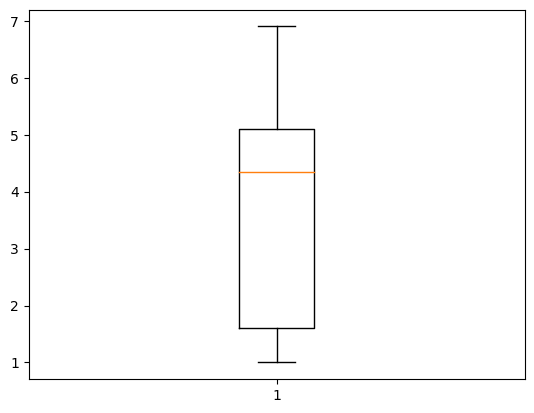

In [38]:
plt.boxplot(data['PL'])
plt.show()

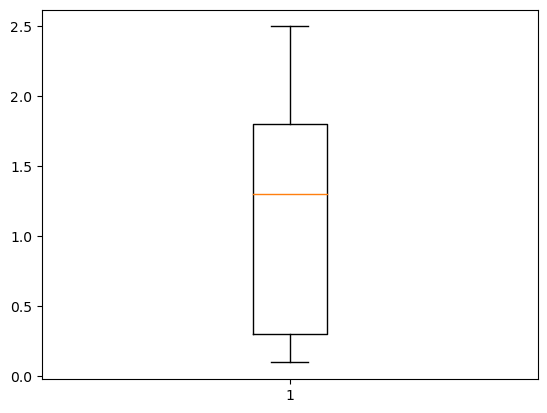

In [39]:
plt.boxplot(data['PW'])
plt.show()

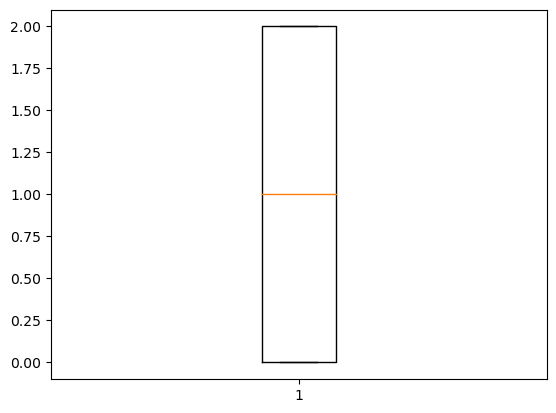

In [40]:
plt.boxplot(data['Classification'])
plt.show()

In [41]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [81]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

# LOGIC REGRESSION

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
logit_model=LogisticRegression()

In [109]:
logit_model.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
y_pred=logit_model.predict(x_test)

In [111]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [112]:
print('Accuracy = ',accuracy_score(y_test,y_pred))


Accuracy =  0.9333333333333333


In [113]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# SVM MODEL

In [114]:
from sklearn.svm import SVC

In [115]:
svmod=SVC(kernel='linear')

In [116]:
svmod.fit(x_train,y_train)

SVC(kernel='linear')

In [117]:
x_pred=svmod.predict(x_test)

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,x_pred))


Accuracy =  0.9666666666666667


In [119]:
confusion_matrix(y_test,x_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [121]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
x_pred=dtc.predict(x_test)

In [123]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,x_pred))


Accuracy =  0.9333333333333333


In [124]:
confusion_matrix(y_test,x_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# RANDOM FOREST

In [125]:
from sklearn.ensemble import RandomForestClassifier
kfc=RandomForestClassifier()

In [126]:
kfc.fit(x_train,y_train)

RandomForestClassifier()

In [127]:
x_pred=kfc.predict(x_test)

In [128]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,x_pred))

Accuracy =  0.9333333333333333


In [129]:
confusion_matrix(y_test,x_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# LINEAR REGRESSION

In [130]:
from sklearn import linear_model

In [131]:
lr=linear_model.LinearRegression()

In [132]:
model=lr.fit(x_train,y_train)

In [133]:
y_pred=model.predict(x_test)

In [134]:
from sklearn.metrics import mean_squared_error,r2_score

In [135]:
print('MSE is',mean_squared_error(y_test,y_pred))

MSE is 0.04868594195940339


In [136]:
print('R squared value is ',r2_score(y_test,y_pred))

R squared value is  0.9332052625556966


In [141]:
model.predict([[5,3,1.3,2]])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.43356653])

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
